# Class Imbalance

## About Dataset

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

For more information, see [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

In [1]:
from os import environ
from google.colab import drive

# if we are starting here we need to remount our drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
from pandas import read_csv

fraud = read_csv('/content/drive/MyDrive/Work/Chapman/MGSC_310/MGSC_310_shared_files_and_resources/Data/creditcard.csv')

fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Check the class distribution
class_counts = fraud['Class'].value_counts()
class_counts

0    284315
1       492
Name: Class, dtype: int64

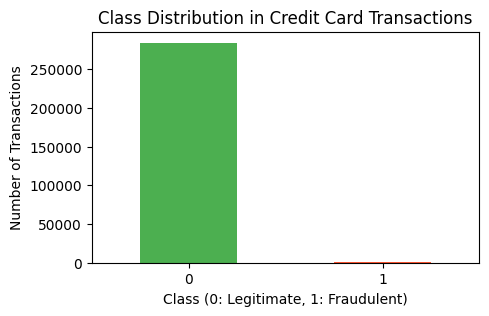

In [11]:
import matplotlib.pyplot as plt

# Plotting the class distribution using a bar chart
plt.figure(figsize=(5, 3))
class_counts.plot(kind='bar', color=['#4CAF50', '#FF5733'])
plt.title('Class Distribution in Credit Card Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(False)

plt.show()


# Upsampling

Involves randomly duplicating observations from the minority class to make its frequency equal to the majority class.

In [8]:
from sklearn.utils import resample
from pandas import concat

# Separate the majority and minority classes
fraud_no = fraud[fraud['Class'] == 0]
fraud_yes = fraud[fraud['Class'] == 1]

# Upsample the minority class
fraud_yes_upsampled = resample(fraud_yes,
                               replace=True, # Implements resampling with replacement. If False, this will implement (sliced) random permutations.
                               n_samples=len(fraud_no),
                               random_state=346123)

# Combine the majority class with upsampled minority class
fraud_upsampled = concat([fraud_no, fraud_yes_upsampled])


In [10]:
fraud_yes_upsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
114271,73408.0,-2.869795,1.335667,-1.009530,1.693885,-0.741480,-0.796773,-2.614242,1.066636,-1.135497,...,0.528421,0.228027,-0.749298,-0.067179,0.215792,-0.453651,0.349191,0.198862,16.48,1
11841,20332.0,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,...,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1.00,1
114271,73408.0,-2.869795,1.335667,-1.009530,1.693885,-0.741480,-0.796773,-2.614242,1.066636,-1.135497,...,0.528421,0.228027,-0.749298,-0.067179,0.215792,-0.453651,0.349191,0.198862,16.48,1
154718,102669.0,-5.603690,5.222193,-7.516830,8.117724,-2.756858,-1.574565,-6.330343,2.998419,-4.508167,...,1.242896,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.479662,0.00,1
42700,41204.0,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,-6.232161,...,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,30.26,1


In [11]:
fraud_upsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# get the class counts

upsampled_class_counts = fraud_upsampled['Class'].value_counts()
upsampled_class_counts

0    284315
1    284315
Name: Class, dtype: int64

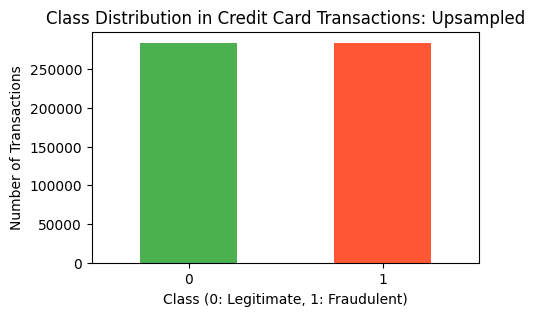

In [15]:
plt.figure(figsize=(5, 3))
upsampled_class_counts.plot(kind='bar', color=['#4CAF50', '#FF5733'])
plt.title('Class Distribution in Credit Card Transactions: Upsampled')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(False)

plt.show()


# Downsampling

Involves randomly removing observations from the majority class to make its frequency equal to the minority class.

In [12]:
# Downsample the majority class
fraud_no_downsampled = resample(fraud_no,
                                replace=False,
                                n_samples=len(fraud_yes),
                                random_state=4328)

# Combine the minority class with downsampled majority class
fraud_downsampled = concat([fraud_no_downsampled, fraud_yes])


In [14]:
fraud_no_downsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19910,30640.0,-0.151687,-0.393380,1.842458,-2.106125,-0.634639,-0.228167,-0.177721,-0.163220,-2.706939,...,-0.053504,0.407379,-0.079829,0.218128,-0.405003,-0.309091,-0.002255,-0.096600,10.00,0
263928,161180.0,2.195876,0.295376,-2.874887,0.029212,1.457308,-0.945870,1.067525,-0.586183,0.086994,...,0.265534,1.035981,-0.299522,0.064949,1.042957,-0.182627,-0.047831,-0.080913,1.00,0
126269,77971.0,-0.838081,0.120464,1.288306,-1.978490,-0.450138,0.008847,-0.557881,0.509976,-1.128386,...,0.445960,0.969985,-0.379886,-0.962872,0.300320,-0.115585,-0.024717,0.007408,29.99,0
187753,127675.0,-0.528420,0.088767,-2.268505,-0.324535,2.231849,-1.177724,1.235436,-0.176352,-0.525854,...,0.500771,1.893637,0.693777,0.275961,-0.929258,-0.182713,0.013467,-0.060801,1.00,0
6177,7198.0,1.010517,-0.202419,1.454047,1.133333,-0.970764,0.060363,-0.653703,0.044440,2.050861,...,-0.149050,-0.038871,0.052737,0.401834,0.123582,0.278961,0.002278,0.032333,64.99,0


In [17]:
# get the class counts

downsampled_class_counts = fraud_downsampled['Class'].value_counts()
downsampled_class_counts

0    492
1    492
Name: Class, dtype: int64

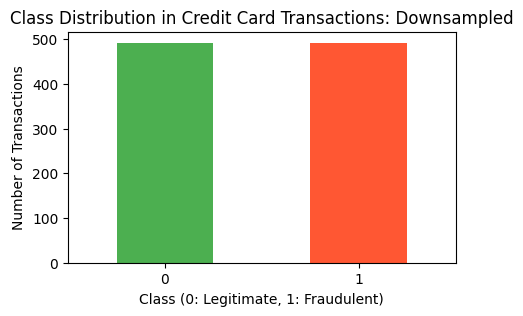

In [18]:
plt.figure(figsize=(5, 3))
downsampled_class_counts.plot(kind='bar', color=['#4CAF50', '#FF5733'])
plt.title('Class Distribution in Credit Card Transactions: Downsampled')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(False)

plt.show()


# SMOTE

SMOTE works by creating synthetic samples in the feature space. For each sample in the minority class, it selects k nearest neighbors, chooses one of them randomly, and then places a synthetic point between the chosen point and its neighbor.

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=34562)
X_res, y_res = smote.fit_resample(fraud.drop('Class', axis=1), fraud['Class'])

In [21]:
X_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [24]:
y_res.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
smote_results = concat([X_res, y_res], axis=1)
smote_results.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
smote_results['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

# Ridge Regression...

- First, let's import the US and World Report "College" dataset by installing the ISLP module and learning how to load directly from our package...
  - [Link to package](https://github.com/intro-stat-learning/ISLP): Always research the packages you install!
  - [Documentation](https://intro-stat-learning.github.io/ISLP/datasets/College.html)


### Data Dictionary:

Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

`Private`: A factor with levels No and Yes indicating private or public university

`Apps`: Number of applications received

`Accept`: Number of applications accepted

`Enroll`: Number of new students enrolled

`Top10perc`: Pct. new students from top 10% of H.S. class

`Top25perc`: Pct. new students from top 25% of H.S. class

`F.Undergrad`: Number of fulltime undergraduates

`P.Undergrad`: Number of parttime undergraduates

`Outstate`: Out-of-state tuition

`Room.Board`: Room and board costs

`Books`: Estimated book costs

`Personal`: Estimated personal spending

`PhD`: Pct. of faculty with Ph.D.’s

`Terminal`: Pct. of faculty with terminal degree

`S.F.Ratio`: Student/faculty ratio

`perc.alumni`: Pct. alumni who donate

`Expend`: Instructional expenditure per student

`Grad.Rate`: Graduation rate

In [18]:
# run this code then restart your runtime above!
! pip install ISLP


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 54.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=02c64ad4bf2cbe70e30e2d96ab6a229eab2e9c86de3c6d55f809ccabcee390d2
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstal

#### ALWAYS remember to resart your runtime after you install a package!

In [1]:
from ISLP import load_data
college = load_data('College')
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [8]:
college.shape

(777, 18)

In [2]:
777/18

43.166666666666664

In [3]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Convert No and Yes to 0 and 1 respectively.

In [4]:
# know how to do this!!
mapping = {'No': 0,'Yes': 1}
college['Private'] = college['Private'].map(mapping)

In [10]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Predicting "Grad.Rate" using every variable...

# Train Test Split

In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = college.drop('Grad.Rate', axis=1)
y = college[["Grad.Rate"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.20,
                                                    random_state=4387,
                                                    shuffle=True) # shuffle our data!!


# Running our Ridge Regression Using `scikit-learn`

In Python, you can `scikit-learn` or `statsmodels.api` to run a ridge regression.We'll use `sklearn` now, [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).

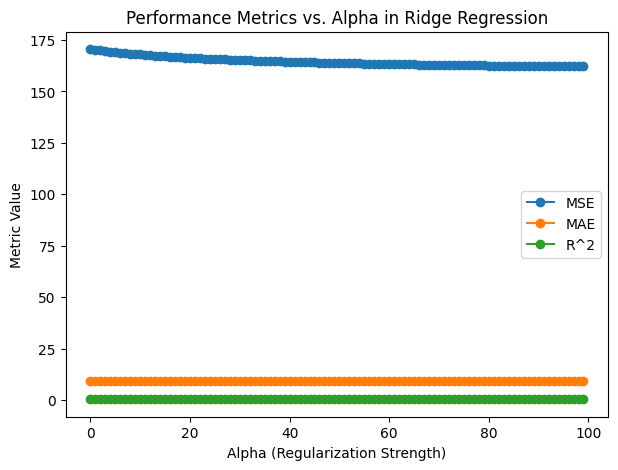

In [46]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_values = []
mae_values = []
r2_values = []
alphas = list(range(0, 100, 1))

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rsqd = r2_score(y_test, y_pred)

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(rsqd)

# Plotting
plt.figure(figsize=(7, 5))
plt.plot(alphas, mse_values, label='MSE', marker='o')
plt.plot(alphas, mae_values, label='MAE', marker='o')
plt.plot(alphas, r2_values, label='R^2', marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. Alpha in Ridge Regression')
plt.legend()
plt.grid(False)
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score, KFold

# Number of folds
k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=2352)
alphas = list(range(0, 100, 1))

mse_values_folds = [[] for _ in range(k)]
mae_values_folds = [[] for _ in range(k)]
r2_values_folds = [[] for _ in range(k)]

avg_mse_values = []
avg_mae_values = []
avg_r2_values = []

for i in alphas:
    reg = Ridge(alpha=i)

    # Compute the metrics for each fold
    mse_scores = -cross_val_score(reg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(reg, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(reg, X_train, y_train, cv=kf, scoring='r2')

    avg_mse_values.append(np.mean(mse_scores))
    avg_mae_values.append(np.mean(mae_scores))
    avg_r2_values.append(np.mean(r2_scores))

    for j in range(k):
        mse_values_folds[j].append(mse_scores[j])
        mae_values_folds[j].append(mae_scores[j])
        r2_values_folds[j].append(r2_scores[j])

# Plotting
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

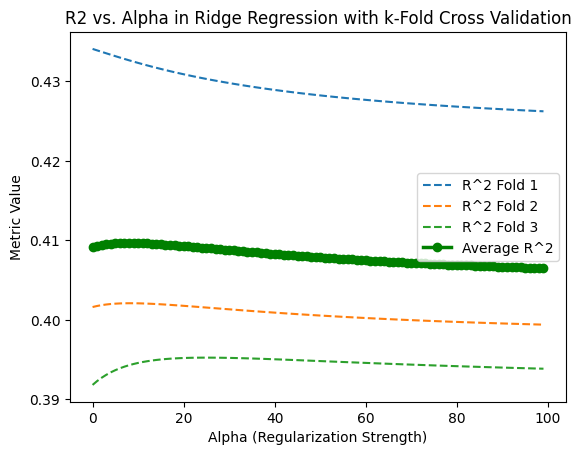

In [43]:
for j in range(k):
    plt.plot(alphas, r2_values_folds[j], label=f'R^2 Fold {j+1}', linestyle='--')
plt.plot(alphas, avg_r2_values, label='Average R^2', marker='o', color='green', linewidth=2.5)

plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Metric Value')
plt.title('R2 vs. Alpha in Ridge Regression with k-Fold Cross Validation')
plt.legend()
plt.grid(False)
plt.show()

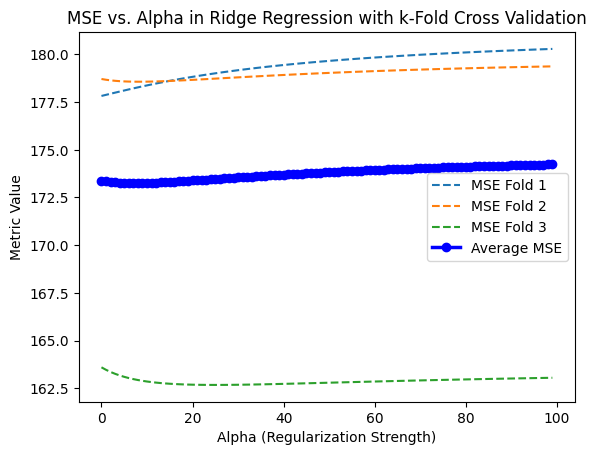

In [44]:
# Plotting MSE for each fold
for j in range(k):
    plt.plot(alphas, mse_values_folds[j], label=f'MSE Fold {j+1}', linestyle='--')
plt.plot(alphas, avg_mse_values, label='Average MSE', marker='o', color='blue', linewidth=2.5)


plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Metric Value')
plt.title('MSE vs. Alpha in Ridge Regression with k-Fold Cross Validation')
plt.legend()
plt.grid(False)
plt.show()

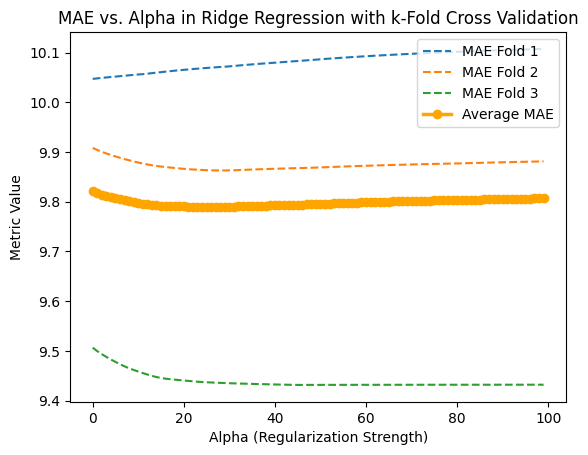

In [45]:
# Plotting MAE for each fold (commented out to avoid clutter, but you can uncomment if desired)
for j in range(k):
    plt.plot(alphas, mae_values_folds[j], label=f'MAE Fold {j+1}', linestyle='--')
plt.plot(alphas, avg_mae_values, label='Average MAE', marker='o', color='orange', linewidth=2.5)

plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Metric Value')
plt.title('MAE vs. Alpha in Ridge Regression with k-Fold Cross Validation')
plt.legend()
plt.grid(False)
plt.show()

# What alpha value to choose?
- From the elbow of each line it seems that around 15-18 is the alpha value that generalizes best.
- Generally speaking, we choose the alpha with the best (lowest) MSE, highest R2, and then predict on that model.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

reg = Ridge(alpha=18)
